In [ ]:
!pip install wget

In [ ]:
import nltk

In [ ]:
import nltk.data

In [ ]:
from nltk.test.gensim_fixt import setup_module

In [ ]:
setup_module()

In [ ]:
pip install pytest

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import gensim

In [ ]:
from nltk.corpus import brown
train_set = brown.sents()[:100000]
model = gensim.models.Word2Vec(train_set)

In [ ]:
model.save('brown.embedding')
new_model = gensim.models.Word2Vec.load('brown.embedding')

In [ ]:
len(new_model.wv['house'])

100

In [ ]:
print(new_model.wv.similarity('money','child')) #> 0.9

0.74400896


In [ ]:
from nltk.data import find
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

In [ ]:
len(model)

43981

In [ ]:
len(model['monkey'])

300

In [ ]:
model.most_similar(positive=['monkey'], topn = 10)

[('monkeys', 0.7102548480033875),
 ('ape', 0.6170222163200378),
 ('snake', 0.6056618690490723),
 ('rabbit', 0.5765783190727234),
 ('frog', 0.5715550780296326),
 ('cat', 0.5593393445014954),
 ('elephant', 0.5475850105285645),
 ('tiger', 0.5347360968589783),
 ('anteater', 0.5292450189590454),
 ('spider', 0.5286433696746826)]

In [ ]:
model.doesnt_match('door window book wall chair'.split())

'book'

In [ ]:
model.doesnt_match('dog cat lion book bird pet'.split())

'book'

In [ ]:
model.most_similar(positive=['woman','king'], negative=['man'], topn = 10)

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902430415153503),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236843228340149),
 ('queens', 0.5181134939193726),
 ('throne', 0.5005807280540466),
 ('royal', 0.493820458650589),
 ('ruler', 0.49092739820480347),
 ('princes', 0.481081485748291)]

In [ ]:
model.most_similar(positive=['pen','plate'], negative=['spoon'], topn = 1)

[('pens', 0.36399418115615845)]

In [ ]:
import numpy as np
labels = []
count = 0
max_count = 1000
X = np.zeros(shape=(max_count,len(model['university'])))

In [ ]:
for term in model.index_to_key:
    X[count] = model[term]
    labels.append(term)
    count+= 1
    if count >= max_count:
        break

In [ ]:
# It is recommended to use PCA first to reduce to ~50 dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_50 = pca.fit_transform(X)

In [ ]:
# Using TSNE to further reduce to 2 dimensions
from sklearn.manifold import TSNE
model_tsne = TSNE(n_components=2, random_state=0)
Y = model_tsne.fit_transform(X_50)

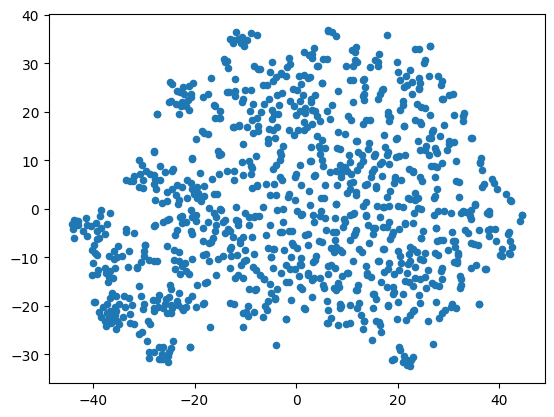

In [ ]:
# Show the scatter plot
import matplotlib.pyplot as plt
plt.scatter(Y[:,0], Y[:,1], 20)

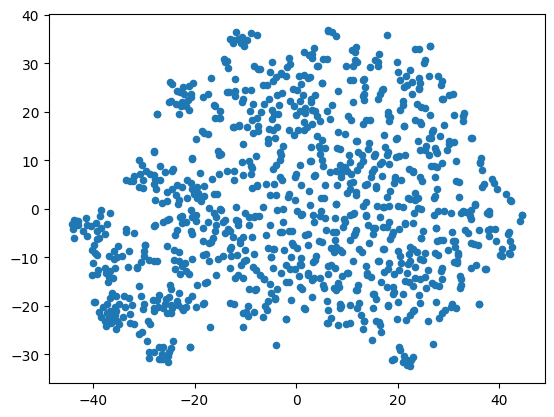

In [ ]:
plt.scatter(Y[:,0], Y[:,1], 20)

plt.show()